In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error



In [3]:
df_train = pd.read_csv('train.csv')
df_train = df_train.drop(columns=['id'])

df_test = pd.read_csv('test.csv')
df_test = df_test.drop(columns=['id'])

In [4]:
def traunsf(data):
    tfm_data = data.copy()
    tfm_data = pd.get_dummies(tfm_data, columns=['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118'], 
                                 prefix = ['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118'])
    tfm_data["first"] = (tfm_data['f12'].apply(lambda x : 
                               x in ['Poselenie Sosenskoe','Nekrasovka','Poselenie Vnukovskoe','Poselenie Moskovskij'])).apply(int)
    tfm_data["second"] = tfm_data['f12'].apply(lambda x : 
                               x not in ['Poselenie Sosenskoe','Nekrasovka','Poselenie Vnukovskoe','Poselenie Moskovskij']).apply(int)
    tfm_data = tfm_data.drop(columns=['f12'])
    
    rep_map = {'f152': {'excellent': 5, 'good': 4, 'satisfactory': 3, 'poor': 2,'no data': 1}}
    tfm_data = tfm_data.replace(rep_map)
    tfm_data = tfm_data.drop(columns=['f1'])
    return tfm_data

In [12]:
def missing(data):
    tfm_data = data.copy()
    # много пропусков
    tfm_data = tfm_data.drop(columns=['f7'])
    tfm_data = tfm_data.drop(columns=['f10'])
    tfm_data = tfm_data.drop(columns=['f24'])
    tfm_data = tfm_data.drop(columns=['f160'])
    tfm_data = tfm_data.drop(columns=['f161'])
    tfm_data = tfm_data.drop(columns=['f162'])
    
    #удалить f6      7650 
    #        f8      7650
    tfm_data = tfm_data.drop(columns=['f6'])
    tfm_data = tfm_data.drop(columns=['f8'])
    
    tfm_data['f77'] = tfm_data['f77'].fillna(0)
    
    tfm_data = tfm_data.fillna(tfm_data.median())
    
    
    
    return tfm_data

    

In [10]:
df_train_tf = traunsf(df_train)
df_test_tf = traunsf(df_test)

In [13]:
df_train_tf = missing(df_train_tf)
df_test_tf = missing(df_test_tf)

In [14]:
df_train_tf

,f2,f3,f4,f5,f9,f13,f14,f15,f16,f17,...,f40_no,f40_yes,f106_no,f106_yes,f114_no,f114_yes,f118_no,f118_yes,first,second
0,69,38.0,7.0,10.0,11.0,2.615514e+07,178264,0.137846,0.041116,14080,...,1,0,1,0,1,0,1,0,0,1
1,55,30.0,2.0,1.0,10.0,3.574795e+07,2546,0.548992,0.034656,175,...,1,0,1,0,1,0,1,0,0,1
2,30,16.0,2.0,12.0,6.0,3.326419e+06,83844,0.051881,0.000000,4688,...,1,0,1,0,1,0,1,0,0,1
3,44,43.0,1.0,12.0,6.0,7.887684e+06,104434,0.222646,0.188784,5989,...,1,0,1,0,1,0,1,0,0,1
4,45,28.0,3.0,5.0,5.0,1.752651e+07,118843,0.133373,0.309479,7454,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24371,55,30.0,7.0,17.0,1.0,2.553630e+07,4001,0.496315,0.007122,275,...,1,0,1,0,1,0,1,0,1,0
24372,43,28.0,2.0,12.0,6.0,7.887684e+06,104434,0.222646,0.188784,5989,...,1,0,1,0,1,0,1,0,0,1
24373,85,30.0,16.0,17.0,1.0,8.591335e+06,111023,0.058543,0.025609,6354,...,1,0,1,0,1,0,1,0,0,1
24374,47,27.0,2.0,10.0,6.0,1.249544e+07,91100,0.027651,0.341072,5947,...,1,0,1,0,1,0,1,0,0,1


In [29]:
(df_train_tf.isnull().sum())[df_train_tf.isnull().sum()>0]

Series([], dtype: int64)

In [30]:
def np_x_y(data):
    y =  data.to_numpy()[:,data.columns.get_loc("target")]
    X = np.delete(data.to_numpy(), data.columns.get_loc("target"), 1)
    return X,y


In [31]:
def funn(X,y,count):
    mean = np.log(y).mean()
    std = np.log(y).std()
    a = mean - count*std
    b = mean + count*std
    
    return X[np.where((np.log(y)<b)&(np.log(y)>a))], y[(np.where((np.log(y)<b)&(np.log(y)>a)))]

    
    

In [32]:
x_train, y_train = np_x_y(df_train_tf)

In [33]:
x_train, y_train = funn(x_train,y_train,2)

In [12]:
V,d,U = np.linalg.svd(x_train, full_matrices = False)

In [13]:
lam = d**2

In [14]:
np.max(lam)/np.min(lam)

1.4519280243367215e+32

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(18360, 295)

In [38]:
X_test.shape

(4590, 295)

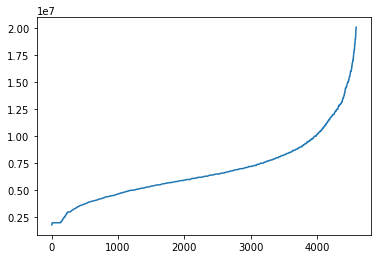

In [39]:
plt.plot(sorted(Y_test))

NameError: name 'np' is not defined

In [ ]:
regr = RandomForestRegressor(max_features = 98,random_state=0)
regr.fit(X_train, Y_train)
reg = regr.predict(X_test)
print(np.sqrt(mean_squared_log_error( Y_test, reg )))

In [ ]:
n_estimators max_dept h 

In [50]:
regr = RandomForestRegressor(max_features = 100,random_state=0)
regr.fit(X_train, Y_train)
reg = regr.predict(X_test)
print(np.sqrt(mean_squared_log_error( Y_test, reg )))
    

0.30203948618656856


In [51]:
from catboost import CatBoostRegressor
# Initialize data

# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
model.fit(X_train, Y_train)
# Get predictions
preds = model.predict(X_test)
print(np.sqrt(mean_squared_log_error( Y_test, preds )))


Learning rate set to 0.064844
0:	learn: 3056386.2181154	total: 284ms	remaining: 4m 43s
1:	learn: 2958084.3471315	total: 370ms	remaining: 3m 4s
2:	learn: 2871688.3951980	total: 422ms	remaining: 2m 20s
3:	learn: 2785694.1171378	total: 472ms	remaining: 1m 57s
4:	learn: 2708609.0010218	total: 520ms	remaining: 1m 43s
5:	learn: 2642510.8817533	total: 569ms	remaining: 1m 34s
6:	learn: 2580830.8614070	total: 618ms	remaining: 1m 27s
7:	learn: 2525340.8173218	total: 671ms	remaining: 1m 23s
8:	learn: 2477774.1967186	total: 718ms	remaining: 1m 19s
9:	learn: 2428429.7447270	total: 764ms	remaining: 1m 15s
10:	learn: 2383952.4983356	total: 813ms	remaining: 1m 13s
11:	learn: 2345850.0271471	total: 861ms	remaining: 1m 10s
12:	learn: 2309179.1787872	total: 911ms	remaining: 1m 9s
13:	learn: 2276185.3578444	total: 961ms	remaining: 1m 7s
14:	learn: 2244420.7945676	total: 1.01s	remaining: 1m 6s
15:	learn: 2217048.3697445	total: 1.06s	remaining: 1m 5s
16:	learn: 2193916.1480501	total: 1.11s	remaining: 1m 4s


147:	learn: 1722993.5656177	total: 7.54s	remaining: 43.4s
148:	learn: 1721688.1975299	total: 7.57s	remaining: 43.3s
149:	learn: 1721207.1877206	total: 7.62s	remaining: 43.2s
150:	learn: 1720632.0629067	total: 7.66s	remaining: 43s
151:	learn: 1719080.8134874	total: 7.7s	remaining: 43s
152:	learn: 1718089.8299459	total: 7.74s	remaining: 42.9s
153:	learn: 1717461.3302417	total: 7.78s	remaining: 42.7s
154:	learn: 1716352.6731420	total: 7.83s	remaining: 42.7s
155:	learn: 1715281.4444009	total: 7.88s	remaining: 42.6s
156:	learn: 1714134.1841647	total: 7.92s	remaining: 42.5s
157:	learn: 1713716.1779340	total: 7.97s	remaining: 42.5s
158:	learn: 1712528.6947713	total: 8.01s	remaining: 42.3s
159:	learn: 1712080.2761573	total: 8.04s	remaining: 42.2s
160:	learn: 1711149.7013665	total: 8.09s	remaining: 42.2s
161:	learn: 1709696.2849448	total: 8.13s	remaining: 42.1s
162:	learn: 1709577.3104907	total: 8.18s	remaining: 42s
163:	learn: 1707835.1818953	total: 8.22s	remaining: 41.9s
164:	learn: 1706936.4

294:	learn: 1592788.1204957	total: 14s	remaining: 33.5s
295:	learn: 1591408.4223145	total: 14s	remaining: 33.4s
296:	learn: 1590381.5228614	total: 14.1s	remaining: 33.3s
297:	learn: 1589863.9977632	total: 14.1s	remaining: 33.3s
298:	learn: 1589253.4069450	total: 14.2s	remaining: 33.2s
299:	learn: 1588465.0917804	total: 14.2s	remaining: 33.2s
300:	learn: 1587711.6139066	total: 14.3s	remaining: 33.1s
301:	learn: 1587671.3378932	total: 14.3s	remaining: 33.1s
302:	learn: 1587267.7702636	total: 14.4s	remaining: 33s
303:	learn: 1586954.6824499	total: 14.4s	remaining: 33s
304:	learn: 1586915.8570224	total: 14.4s	remaining: 32.9s
305:	learn: 1586104.2936444	total: 14.5s	remaining: 32.8s
306:	learn: 1585350.8671638	total: 14.5s	remaining: 32.8s
307:	learn: 1584768.5935662	total: 14.6s	remaining: 32.8s
308:	learn: 1583869.2552420	total: 14.6s	remaining: 32.7s
309:	learn: 1583108.0004685	total: 14.7s	remaining: 32.7s
310:	learn: 1582236.2255630	total: 14.7s	remaining: 32.6s
311:	learn: 1581448.65

439:	learn: 1498879.4998382	total: 20.5s	remaining: 26.2s
440:	learn: 1498450.8546831	total: 20.6s	remaining: 26.1s
441:	learn: 1497691.3106811	total: 20.6s	remaining: 26s
442:	learn: 1497435.3501183	total: 20.7s	remaining: 26s
443:	learn: 1496479.2702299	total: 20.7s	remaining: 26s
444:	learn: 1495920.0278323	total: 20.8s	remaining: 25.9s
445:	learn: 1495241.6117104	total: 20.8s	remaining: 25.9s
446:	learn: 1494806.1938609	total: 20.9s	remaining: 25.8s
447:	learn: 1493976.9033963	total: 20.9s	remaining: 25.8s
448:	learn: 1493744.5763392	total: 21s	remaining: 25.7s
449:	learn: 1493051.2880202	total: 21s	remaining: 25.7s
450:	learn: 1492017.9123497	total: 21.1s	remaining: 25.6s
451:	learn: 1491651.9339569	total: 21.1s	remaining: 25.6s
452:	learn: 1491156.0877932	total: 21.1s	remaining: 25.5s
453:	learn: 1490769.3868575	total: 21.2s	remaining: 25.5s
454:	learn: 1490132.2226819	total: 21.2s	remaining: 25.4s
455:	learn: 1489519.7798504	total: 21.3s	remaining: 25.4s
456:	learn: 1488843.6762

584:	learn: 1418049.6199152	total: 27.2s	remaining: 19.3s
585:	learn: 1417642.1199999	total: 27.3s	remaining: 19.3s
586:	learn: 1417320.5195920	total: 27.3s	remaining: 19.2s
587:	learn: 1417071.9766339	total: 27.3s	remaining: 19.2s
588:	learn: 1416766.5299803	total: 27.4s	remaining: 19.1s
589:	learn: 1416289.2841875	total: 27.4s	remaining: 19.1s
590:	learn: 1415864.4528443	total: 27.5s	remaining: 19s
591:	learn: 1415063.9340309	total: 27.5s	remaining: 19s
592:	learn: 1414717.3906303	total: 27.6s	remaining: 18.9s
593:	learn: 1414068.0444348	total: 27.6s	remaining: 18.9s
594:	learn: 1413830.8715205	total: 27.7s	remaining: 18.8s
595:	learn: 1413329.5311549	total: 27.7s	remaining: 18.8s
596:	learn: 1412754.0594018	total: 27.8s	remaining: 18.7s
597:	learn: 1412253.0355096	total: 27.8s	remaining: 18.7s
598:	learn: 1411643.7767162	total: 27.8s	remaining: 18.6s
599:	learn: 1411031.5990156	total: 27.9s	remaining: 18.6s
600:	learn: 1410789.9480270	total: 27.9s	remaining: 18.5s
601:	learn: 141037

728:	learn: 1355786.4315704	total: 33.7s	remaining: 12.5s
729:	learn: 1355632.7203372	total: 33.7s	remaining: 12.5s
730:	learn: 1355254.9860104	total: 33.8s	remaining: 12.4s
731:	learn: 1355128.6484680	total: 33.8s	remaining: 12.4s
732:	learn: 1354658.3443119	total: 33.9s	remaining: 12.3s
733:	learn: 1354480.1110023	total: 33.9s	remaining: 12.3s
734:	learn: 1354173.8478640	total: 34s	remaining: 12.2s
735:	learn: 1353732.8738558	total: 34s	remaining: 12.2s
736:	learn: 1353346.0163362	total: 34.1s	remaining: 12.2s
737:	learn: 1352870.9459882	total: 34.1s	remaining: 12.1s
738:	learn: 1352445.9628571	total: 34.2s	remaining: 12.1s
739:	learn: 1352028.0901831	total: 34.2s	remaining: 12s
740:	learn: 1351647.6896994	total: 34.2s	remaining: 12s
741:	learn: 1351133.0994687	total: 34.3s	remaining: 11.9s
742:	learn: 1350677.4868216	total: 34.3s	remaining: 11.9s
743:	learn: 1350284.4231208	total: 34.4s	remaining: 11.8s
744:	learn: 1349604.6857943	total: 34.4s	remaining: 11.8s
745:	learn: 1348818.47

871:	learn: 1299853.3512646	total: 40.3s	remaining: 5.92s
872:	learn: 1299763.6489717	total: 40.4s	remaining: 5.87s
873:	learn: 1299287.8815683	total: 40.4s	remaining: 5.83s
874:	learn: 1298890.1590479	total: 40.5s	remaining: 5.78s
875:	learn: 1298513.2419365	total: 40.5s	remaining: 5.73s
876:	learn: 1297901.2024184	total: 40.5s	remaining: 5.69s
877:	learn: 1297594.8974086	total: 40.6s	remaining: 5.64s
878:	learn: 1296977.7063850	total: 40.6s	remaining: 5.59s
879:	learn: 1296485.4585818	total: 40.7s	remaining: 5.55s
880:	learn: 1295803.3238392	total: 40.7s	remaining: 5.5s
881:	learn: 1295306.5128827	total: 40.8s	remaining: 5.46s
882:	learn: 1295100.7674735	total: 40.8s	remaining: 5.41s
883:	learn: 1294972.7370708	total: 40.9s	remaining: 5.37s
884:	learn: 1294810.4734158	total: 40.9s	remaining: 5.32s
885:	learn: 1294497.9823494	total: 41s	remaining: 5.27s
886:	learn: 1294107.5038437	total: 41s	remaining: 5.23s
887:	learn: 1293458.2280774	total: 41.1s	remaining: 5.18s
888:	learn: 1293427

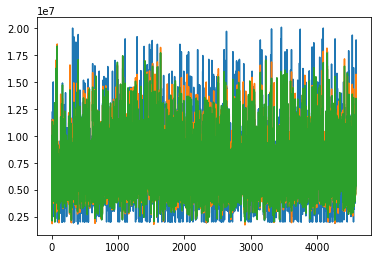

In [56]:
plt.plot((Y_test))
plt.plot((preds))
plt.plot((reg))

In [60]:
np.argsort(Y_test)

array([ 393, 4268,  326, ...,  314, 4093, 3462], dtype=int64)

In [108]:
X_test[:,12].mean()

5394.5061002178645

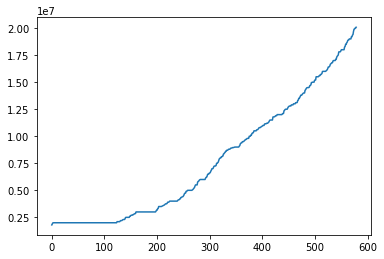

In [116]:
plt.plot(sorted(Y_test[np.where(np.abs(preds - Y_test) > 2000000)]))

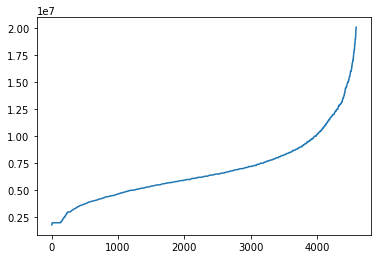

In [117]:
plt.plot(sorted(Y_test))

In [111]:
np.where(np.abs(reg - Y_test) > 2000000)

(array([  20,   21,   22,   27,   30,   39,   43,   54,   57,   77,   88,
          93,   98,  114,  134,  139,  150,  154,  163,  166,  181,  192,
         207,  217,  221,  224,  233,  236,  238,  244,  259,  274,  276,
         287,  289,  314,  326,  329,  331,  333,  339,  343,  344,  363,
         386,  393,  398,  430,  439,  454,  462,  469,  479,  487,  494,
         498,  499,  506,  521,  523,  525,  528,  536,  544,  547,  550,
         552,  554,  567,  568,  582,  595,  607,  615,  616,  639,  640,
         646,  650,  653,  661,  662,  683,  688,  713,  715,  716,  748,
         754,  775,  798,  804,  826,  827,  829,  832,  844,  854,  856,
         864,  871,  874,  883,  884,  885,  891,  907,  915,  918,  945,
         953,  972,  988,  991,  994,  998, 1000, 1001, 1006, 1007, 1020,
        1024, 1041, 1043, 1046, 1096, 1101, 1106, 1110, 1121, 1132, 1133,
        1138, 1142, 1153, 1200, 1206, 1208, 1229, 1233, 1246, 1262, 1263,
        1268, 1277, 1286, 1290, 1291, 

In [110]:
np.where(np.abs(preds - Y_test) > 2000000)

(array([   8,   21,   22,   27,   30,   54,   57,   71,   77,   88,   93,
          98,  114,  134,  139,  150,  154,  163,  166,  192,  207,  209,
         217,  221,  236,  274,  276,  287,  289,  314,  324,  326,  329,
         331,  333,  339,  343,  360,  363,  386,  393,  398,  401,  422,
         424,  430,  464,  469,  487,  499,  505,  521,  523,  528,  536,
         544,  550,  552,  554,  567,  607,  640,  645,  646,  650,  653,
         661,  662,  671,  688,  713,  715,  716,  754,  771,  826,  827,
         829,  832,  840,  844,  854,  864,  871,  874,  883,  884,  885,
         890,  891,  907,  915,  918,  934,  942,  953,  972,  988,  998,
        1000, 1001, 1006, 1007, 1020, 1024, 1041, 1044, 1046, 1096, 1101,
        1106, 1110, 1132, 1133, 1138, 1142, 1153, 1200, 1215, 1229, 1233,
        1246, 1262, 1263, 1268, 1277, 1286, 1291, 1305, 1317, 1333, 1338,
        1339, 1341, 1343, 1347, 1356, 1357, 1359, 1389, 1392, 1414, 1415,
        1422, 1434, 1436, 1444, 1464, 

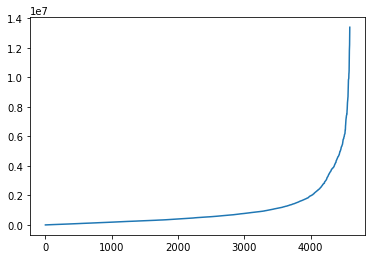

In [67]:
plt.plot(sorted(np.abs(preds - Y_test)))

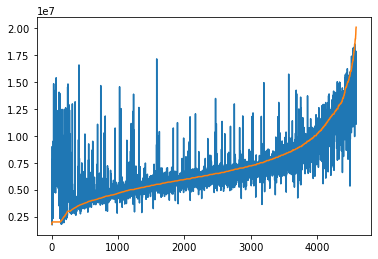

In [64]:
plt.plot(preds[np.argsort(Y_test)])
plt.plot(Y_test[np.argsort(Y_test)])


In [59]:
(Y_test - preds).mean(),(Y_test - preds).std()

(-17907.984442695164, 1787935.4130614717)

0.4430122722482979


0.44300839180427204


In [17]:
x_train.shape, y_train.shape

((22950, 295), (22950,))

In [ ]:
kf = KFold(n_splits=2)
for train, test in kf.split(x_train):
    X_test,X_train = x_train[test], x_train[train]
    Y_test,Y_train = y_train[test], y_train[train]
    
    regr = RandomForestRegressor(max_features = 98,random_state=0)
    regr.fit(X_train, Y_train)
    reg = regr.predict(X_test)
    print(np.sqrt(mean_squared_log_error( Y_test, reg )))

    

In [15]:
print(np.sqrt(mean_squared_log_error( Y_test, reg )))

NameError: name 'Y_test' is not defined

In [ ]:
from catboost import CatBoostRegressor

kf = KFold(n_splits=2)
for train, test in kf.split(x_train):
    X_test,X_train = x_train[test], x_train[train]
    Y_test,Y_train = y_train[test], y_train[train]
    
    # Initialize data


    # Initialize CatBoostRegressor
    model = CatBoostRegressor()
# Fit model
    model.fit(X_train, Y_train)
# Get predictions
    preds = model.predict(X_test)

In [16]:
print(np.sqrt(mean_squared_log_error( Y_test, preds )))


NameError: name 'Y_test' is not defined

In [ ]:
0.30008745001773224
0.30191381464279593

In [ ]:
plt.plot(sorted(Y_test))
plt.plot(sorted(reg))
plt.plot(sorted(preds))

In [ ]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=100)
reg.fit(x_train, y_train)
an = reg.predict(x_test)
#print(reg.coef_)
plt.plot(sorted(an))
#reg.intercept_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)
reg = regr.predict(df_test_tf.to_numpy())


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
# Initialize data


# Initialize CatBoostRegressor
model = CatBoostRegressor()
# Fit model
model.fit(x_train, y_train)
# Get predictions
preds = model.predict(df_test_tf.to_numpy())

In [ ]:
plt.plot(sorted(reg))
plt.plot(sorted(preds))

preds

In [ ]:
reg.fit(x_train, y_train)


In [ ]:
reg.shape

In [ ]:
col = np.array(range(1,len(preds)+1))
result = np.c_[col,preds]
print(result)
with open("sample_sabmission.csv", "wb") as f:
    f.write(b'id,prediction\n')
    np.savetxt(f, result, fmt='%i', delimiter=",")

In [ ]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, reg))